# Pipeline Demo
- Download Data
- Load Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller, arma_order_select_ic
import itertools


#Own packages
import download
import descriptive
import models

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
params = {
    'outcome_col': 'iva_neto_(mmdp)_r',
    'pred_start': '2010-01-01',
    'pred_end': '2020-01-01',
    'pred_period': '12MS'
}

## Download Data

In [4]:
# download.get_files(inpc=True, fiscal_current=True, fiscal_hist=True)

## Load Data

In [5]:
fiscal_income_df = download.load_fiscal_income()
fiscal_income_df = fiscal_income_df.asfreq(freq='MS')

## Describing Data

In [6]:
fiscal_income_df.columns

Index(['ingresos_sector_publico_neto_(mmdp)', 'iva_neto_(mmdp)',
       'ieps_neto_(mmdp)', 'ingresos_no_tributarios_neto_(mmdp)',
       'ingresos_gobierno_federal_neto_(mmdp)',
       'ingresos_tributarios_neto_(mmdp)', 'isr_neto_(mmdp)', 'inpc_2018',
       'ingresos_sector_publico_neto_(mmdp)_r', 'iva_neto_(mmdp)_r',
       'ieps_neto_(mmdp)_r', 'ingresos_no_tributarios_neto_(mmdp)_r',
       'ingresos_gobierno_federal_neto_(mmdp)_r',
       'ingresos_tributarios_neto_(mmdp)_r', 'isr_neto_(mmdp)_r'],
      dtype='object')

In [7]:
display(fiscal_income_df.columns)
display(fiscal_income_df.shape)
display(fiscal_income_df.isnull().any())
display(fiscal_income_df.head())
display(fiscal_income_df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

Index(['ingresos_sector_publico_neto_(mmdp)', 'iva_neto_(mmdp)',
       'ieps_neto_(mmdp)', 'ingresos_no_tributarios_neto_(mmdp)',
       'ingresos_gobierno_federal_neto_(mmdp)',
       'ingresos_tributarios_neto_(mmdp)', 'isr_neto_(mmdp)', 'inpc_2018',
       'ingresos_sector_publico_neto_(mmdp)_r', 'iva_neto_(mmdp)_r',
       'ieps_neto_(mmdp)_r', 'ingresos_no_tributarios_neto_(mmdp)_r',
       'ingresos_gobierno_federal_neto_(mmdp)_r',
       'ingresos_tributarios_neto_(mmdp)_r', 'isr_neto_(mmdp)_r'],
      dtype='object')

(352, 15)

ingresos_sector_publico_neto_(mmdp)        False
iva_neto_(mmdp)                            False
ieps_neto_(mmdp)                           False
ingresos_no_tributarios_neto_(mmdp)        False
ingresos_gobierno_federal_neto_(mmdp)      False
ingresos_tributarios_neto_(mmdp)           False
isr_neto_(mmdp)                            False
inpc_2018                                  False
ingresos_sector_publico_neto_(mmdp)_r      False
iva_neto_(mmdp)_r                          False
ieps_neto_(mmdp)_r                         False
ingresos_no_tributarios_neto_(mmdp)_r      False
ingresos_gobierno_federal_neto_(mmdp)_r    False
ingresos_tributarios_neto_(mmdp)_r         False
isr_neto_(mmdp)_r                          False
dtype: bool

ingresos_sector_publico_neto_(mmdp)  iva_neto_(mmdp)  \
fecha                                                              
1990-01-01                            15.527708         2.092649   
1990-02-01                            12.748535         1.796237   
1990-03-01                            14.284656         2.005865   
1990-04-01                            14.074744         2.032419   
1990-05-01                            14.048018         2.060314   

            ieps_neto_(mmdp)  ingresos_no_tributarios_neto_(mmdp)  \
fecha                                                               
1990-01-01          1.040445                             7.923974   
1990-02-01          0.887693                             7.192572   
1990-03-01          0.800115                             8.635537   
1990-04-01          0.860166                             7.489060   
1990-05-01          0.801122                             8.258059   

            ingresos_gobierno_federal_neto_(mmdp)  \
fecha                                               
1990-01-01                              10.861811   
1990-02-01                               8.522032   
1990-03-01                               8.296806   
1990-04-01                               9.702308   
1990-05-01                               8.834236   

            ingresos_tributarios_neto_(mmdp)  isr_neto_(mmdp)  inpc_2018  \
fecha                                                                      
1990-01-01                          7.603734         3.897608   7.776037   
1990-02-01                          5.555963         2.299732   7.952120   
1990-03-01                          5.649119         2.082503   8.092310   
1990-04-01                          6.585684         3.020333   8.215472   
1990-05-01                          5.789959         2.311738   8.358838   

            ingresos_sector_publico_neto_(mmdp)_r  iva_neto_(mmdp)_r  \
fecha                                                                  
1990-01-01                             199.686645          26.911509   
1990-02-01                             160.316183          22.588153   
1990-03-01                             176.521366          24.787298   
1990-04-01                             171.319977          24.738921   
1990-05-01                             168.061859          24.648331   

            ieps_neto_(mmdp)_r  ingresos_no_tributarios_neto_(mmdp)_r  \
fecha                                                                   
1990-01-01           13.380144                             101.902469   
1990-02-01           11.162973                              90.448486   
1990-03-01            9.887350                             106.712880   
1990-04-01           10.470075                              91.158005   
1990-05-01            9.584132                              98.794346   

            ingresos_gobierno_federal_neto_(mmdp)_r  \
fecha                                                 
1990-01-01                               139.683113   
1990-02-01                               107.166795   
1990-03-01                               102.527042   
1990-04-01                               118.098005   
1990-05-01                               105.687374   

            ingresos_tributarios_neto_(mmdp)_r  isr_neto_(mmdp)_r  
fecha                                                              
1990-01-01                           97.784176          50.123319  
1990-02-01                           69.867697          28.919735  
1990-03-01                           69.808486          25.734346  
1990-04-01                           80.161972          36.763964  
1990-05-01                           69.267513          27.656214

ingresos_sector_publico_neto_(mmdp)  iva_neto_(mmdp)  ieps_neto_(mmdp)  \
count                           352.000000       352.000000        352.000000   
mean                            178.691439        28.908804          6.712550   
std                             137.825704        23.164949         12.215370   
min                              12.748535         1.796237        -40.485066   
25%                              56.511095         7.427295          1.064180   
50%                             148.864590        23.701243          3.107447   
75%                             284.114700        44.888799          9.342124   
85%                             327.256770        56.353127         15.589635   
95%                             425.787903        74.426980         32.852311   
99%                             514.036232        83.434382         38.734505   
max                             719.218859        99.012424         45.378364   

       ingresos_no_tributarios_neto_(mmdp)  \
count                           352.000000   
mean                             93.515994   
std                              73.426901   
min                               7.192572   
25%                              30.375018   
50%                              84.446537   
75%                             145.851404   
85%                             167.968401   
95%                             194.225448   
99%                             331.003160   
max                             469.672858   

       ingresos_gobierno_federal_neto_(mmdp)  \
count                             352.000000   
mean                              129.484646   
std                               104.122125   
min                                 8.296806   
25%                                38.304509   
50%                               107.498729   
75%                               203.699450   
85%                               246.684089   
95%                               315.551542   
99%                               388.916231   
max                               639.555014   

       ingresos_tributarios_neto_(mmdp)  isr_neto_(mmdp)   inpc_2018  \
count                        352.000000       352.000000  352.000000   
mean                          85.175445        44.842295   54.510719   
std                           74.267992        42.370611   27.997773   
min                            5.555963         2.082503    7.776037   
25%                           23.550126        10.685149   30.906083   
50%                           63.949478        29.094310   57.062979   
75%                          110.857582        65.551319   77.857744   
85%                          171.519263        89.724418   86.835034   
95%                          246.993549       129.757645   97.146876   
99%                          288.273418       173.803202  103.048910   
max                          318.497355       204.305311  103.531000   

       ingresos_sector_publico_neto_(mmdp)_r  iva_neto_(mmdp)_r  \
count                             352.000000         352.000000   
mean                              283.666719          44.197229   
std                               102.619119          19.035441   
min                               149.787417          16.586130   
25%                               192.201605          26.311380   
50%                               264.424829          42.419467   
75%                               359.539367          57.471790   
85%                               385.144537          65.890009   
95%                               440.036807          77.590947   
99%                               595.036297          88.611367   
max                               759.290496         100.220076   

       ieps_neto_(mmdp)_r  ingresos_no_tributarios_neto_(mmdp)_r  \
count          352.000000                             352.000000   
mean            11.670799                             151.740500   
std             14.151510     

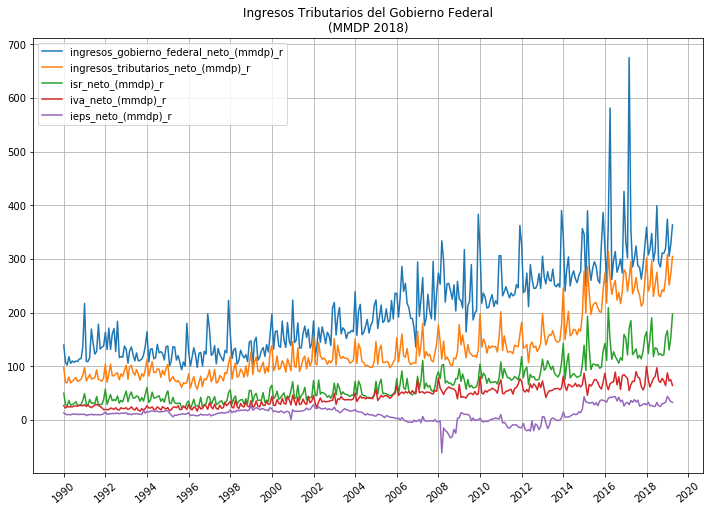

In [8]:
to_plot = ['ingresos_gobierno_federal_neto_(mmdp)_r', 'ingresos_tributarios_neto_(mmdp)_r', 'isr_neto_(mmdp)_r',
           'iva_neto_(mmdp)_r', 'ieps_neto_(mmdp)_r']
descriptive.plot_series(fiscal_income_df, to_plot, 'Ingresos Tributarios del Gobierno Federal', 
                        '(MMDP 2018)', ticks = 'yearly', ticks_freq=2)

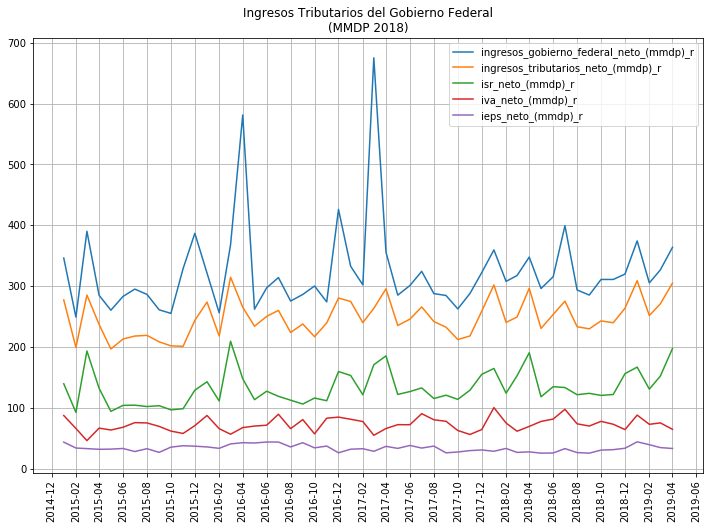

In [9]:
to_plot = ['ingresos_gobierno_federal_neto_(mmdp)_r', 'ingresos_tributarios_neto_(mmdp)_r', 'isr_neto_(mmdp)_r',
           'iva_neto_(mmdp)_r', 'ieps_neto_(mmdp)_r']
descriptive.plot_series(fiscal_income_df, to_plot, 'Ingresos Tributarios del Gobierno Federal', 
                        '(MMDP 2018)', ticks = 'monthly', ticks_freq=2, min_date='2015-01-01')

## Decomposition Naive

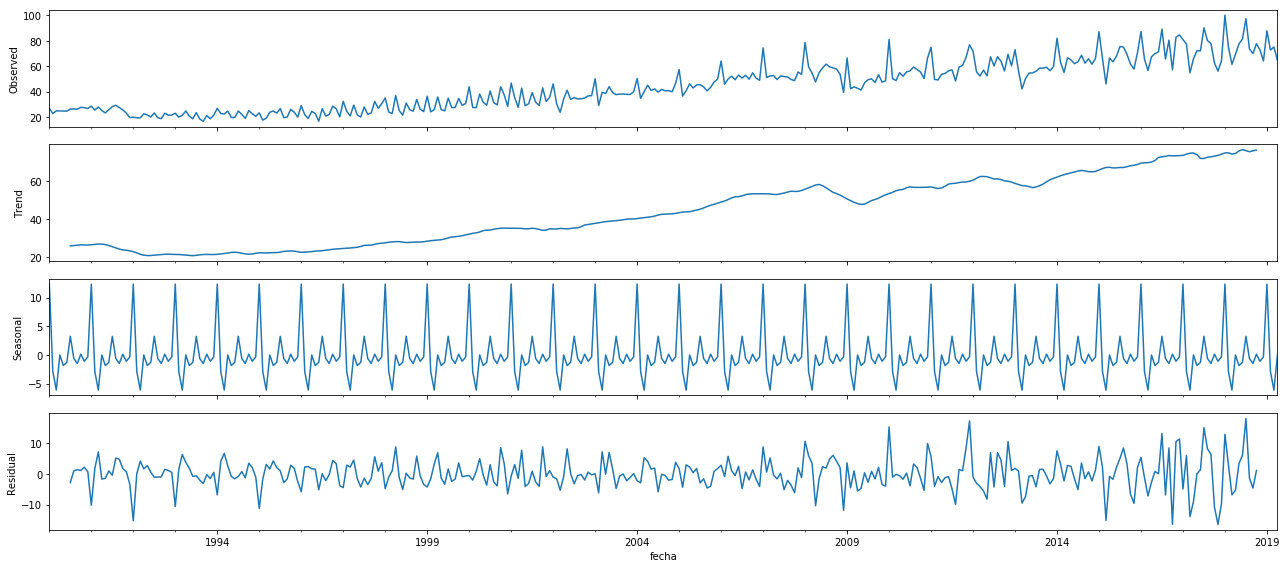

statsmodels.tsa.seasonal.DecomposeResult

In [10]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(fiscal_income_df[params['outcome_col']], model='additive')
fig = decomposition.plot()
plt.show()
type(decomposition)

Se ve tendencia positiva en ingresos tributarios y estacionalidad. 

### Zoom a estacionalidad

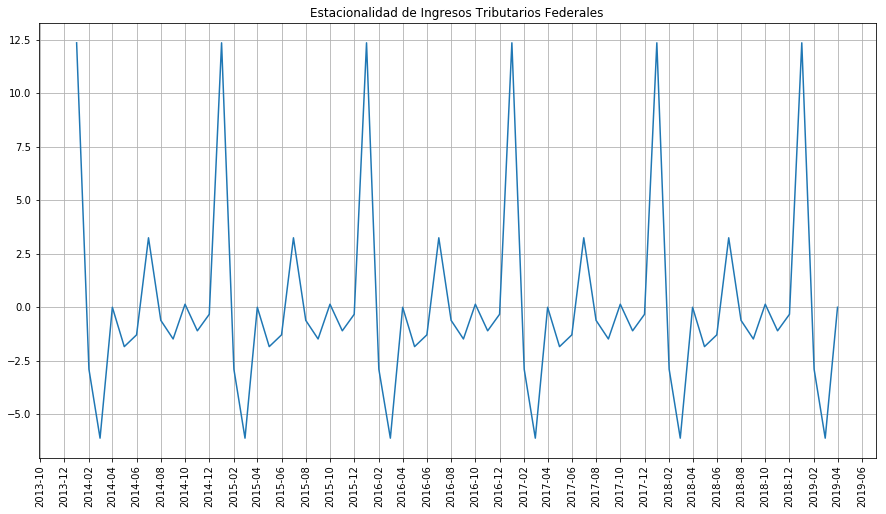

In [11]:
descriptive.plot_series(decomposition.seasonal, title='Estacionalidad de Ingresos Tributarios Federales',
                        figsize=(15, 8), legend=False, ticks = 'monthly',
                        ticks_freq= 2, min_date= '2014-01-01')

Se ve tendencia positiva de ingresos fiscales, así como fuerte componente estacional.Diciembre y Enero son los meses con mayores ingresos, Febrero siempre tiene una caida muy fuerte. Marzo es también de altos ingresos, y los demás meses se mantienen oscilando en niveles bajos y medios. 

## Hodrick Prescot

In [12]:
cycle, trend = sm.tsa.filters.hpfilter(fiscal_income_df[params['outcome_col']], 129600)
hp_decomp = fiscal_income_df[[params['outcome_col']]].copy()
hp_decomp["cycle"] = cycle
hp_decomp["trend"] = trend

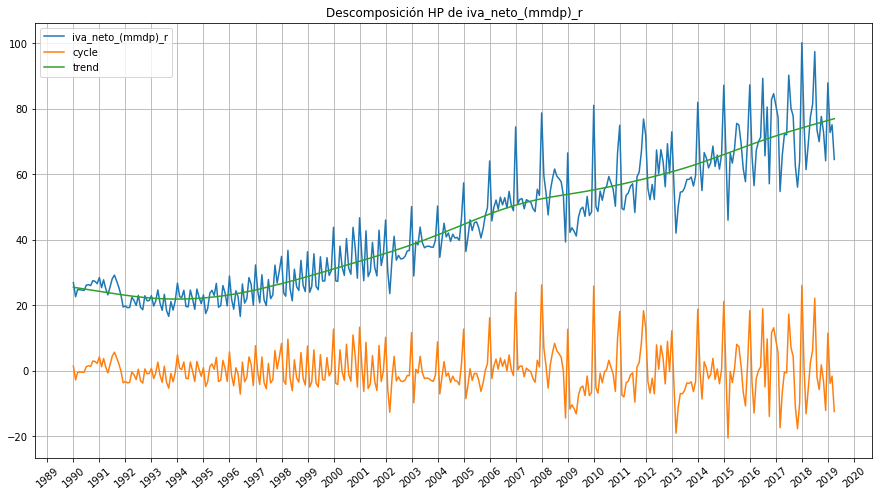

In [13]:
descriptive.plot_series(hp_decomp, title='Descomposición HP de {}'.format(params['outcome_col']),
                        figsize=(15, 8), ticks='yearly')

### Zoom a estacionalidad

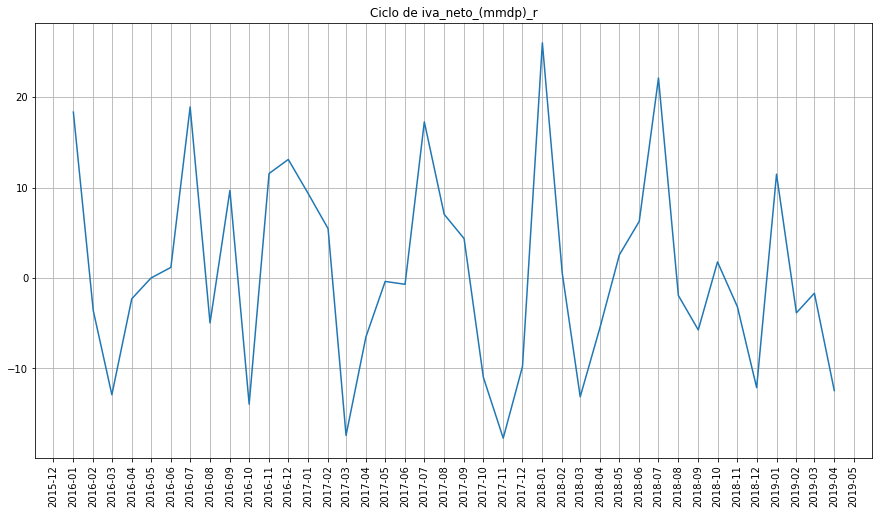

In [14]:
descriptive.plot_series(cycle, title='Ciclo de {}'.format(params['outcome_col']),
                        figsize=(15, 8), legend=False, ticks = 'monthly',
                        ticks_freq= 1, min_date= '2016-01-01')

## Testing for stationarity and transforming

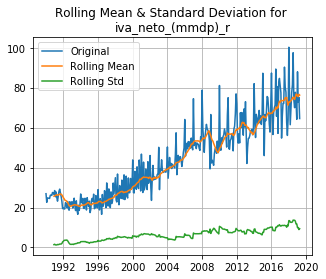

Results of Dickey-Fuller Test:
Test Statistic                   0.393532
p-value                          0.981251
# Lags Used                     13.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64


In [15]:
descriptive.test_stationarity(fiscal_income_df, params['outcome_col'])


 
 TRANSFORMATION log 



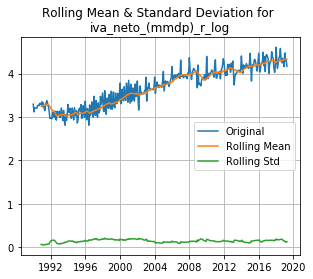

Results of Dickey-Fuller Test:
Test Statistic                  -0.091759
p-value                          0.950253
# Lags Used                     13.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64

 
 TRANSFORMATION diff 



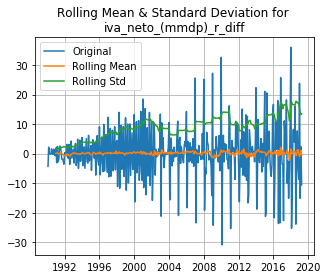

Results of Dickey-Fuller Test:
Test Statistic                -7.319596e+00
p-value                        1.203888e-10
# Lags Used                    1.200000e+01
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64

 
 TRANSFORMATION log_diff 



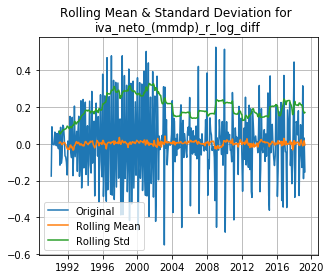

Results of Dickey-Fuller Test:
Test Statistic                -6.580338e+00
p-value                        7.542121e-09
# Lags Used                    1.200000e+01
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64


In [16]:
transforms = ['log', 'diff', 'log_diff']
for t in transforms:
    print('\n \n TRANSFORMATION {} \n'.format(t))
    new_serie_name = params['outcome_col'] + '_' + t
    fiscal_income_df[new_serie_name] = descriptive.transformation(fiscal_income_df, params['outcome_col'], t)
    descriptive.test_stationarity(fiscal_income_df, new_serie_name)

## Stationarity results
- level: Not stationary
- log: Not stationary
- diff: Stationary
- log_diff: Stationary

Vamos a usar log diff para el análisis

# PREDICTION

In [36]:
params['transformation'] = 'log_diff'
params['arima'] = {'p': range(2, 4),
                   'q': range(2,4)}
time_splits = pd.date_range(start='2010-01-01', end='2020-01-01', freq='12MS')

In [37]:
outcome_ts = fiscal_income_df[params['outcome_col']]
objective_ts = fiscal_income_df[params['outcome_col'] + '_' + params['transformation']]
objective_ts = objective_ts[objective_ts.notna()]

# ARIMA

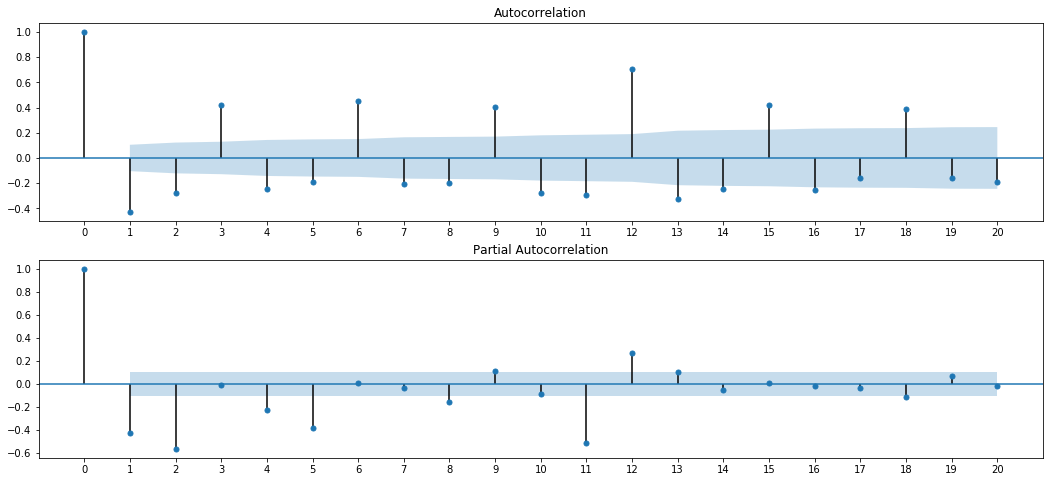

In [38]:
descriptive.plot_acf_pacf(objective_ts, 20)

### Getting best P and Q

In [39]:
arma_order_select_ic(objective_ts, 3, 3, ic=['aic', 'bic'], trend = 'nc')

{'aic':             0           1           2           3
 0         NaN -334.188569 -332.832467 -352.075900
 1 -207.740693 -332.559168 -340.949986 -354.645513
 2 -336.552841 -347.058904 -363.442171 -438.290861
 3 -334.570210 -362.986568 -369.445162 -446.106035,
 'bic':             0           1           2           3
 0         NaN -326.466996 -321.250108 -336.632755
 1 -200.019121 -320.976810 -325.506841 -335.341582
 2 -324.970482 -331.615759 -344.138240 -415.126144
 3 -319.127065 -343.682637 -346.280445 -419.080532,
 'aic_min_order': (3, 3),
 'bic_min_order': (3, 3)}

In [62]:
p, q = params['arima']['p'], params['arima']['q']
piq = [(x[0], 0, x[1]) for x in list(itertools.product(p, q))]
arima_params = [{'order': order} for order in piq]

ARIMA: order: (2, 0, 2), 


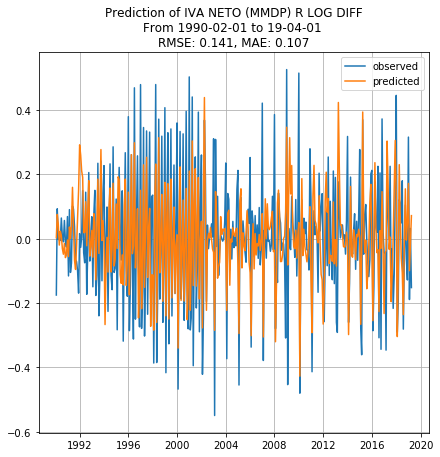

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ARIMA: order: (2, 0, 2), 


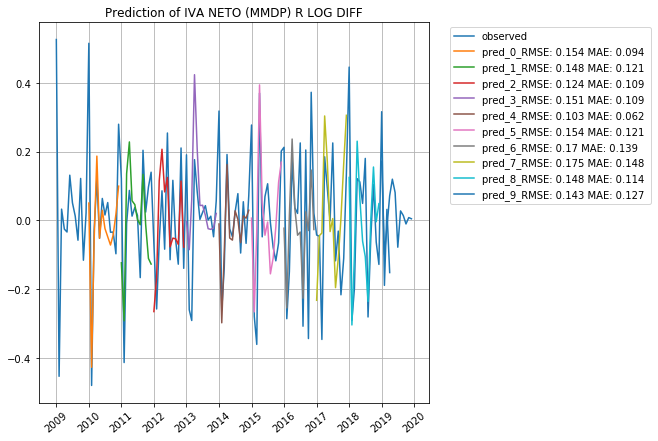

ARIMA: order: (2, 0, 2), 


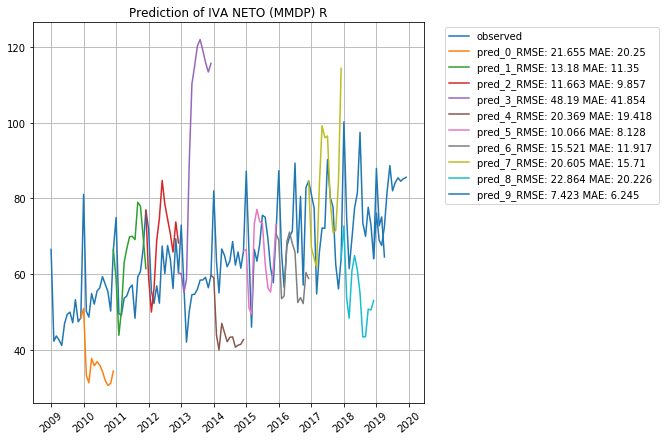

ARIMA: order: (2, 0, 3), 


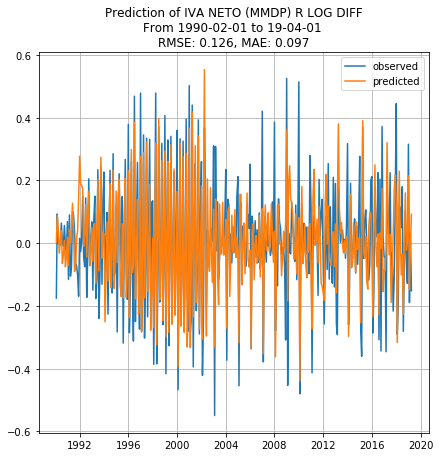

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ARIMA: order: (2, 0, 3), 


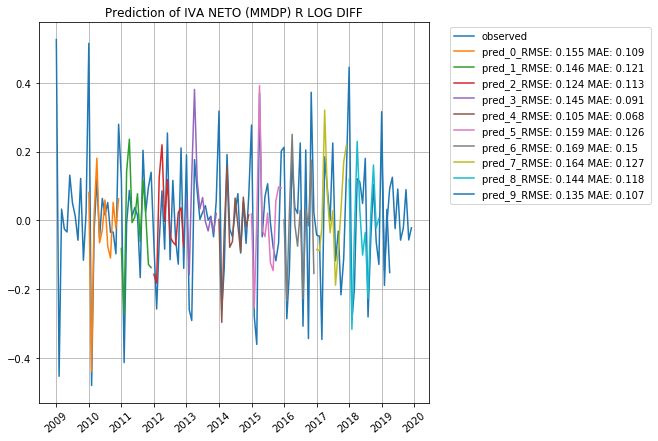

ARIMA: order: (2, 0, 3), 


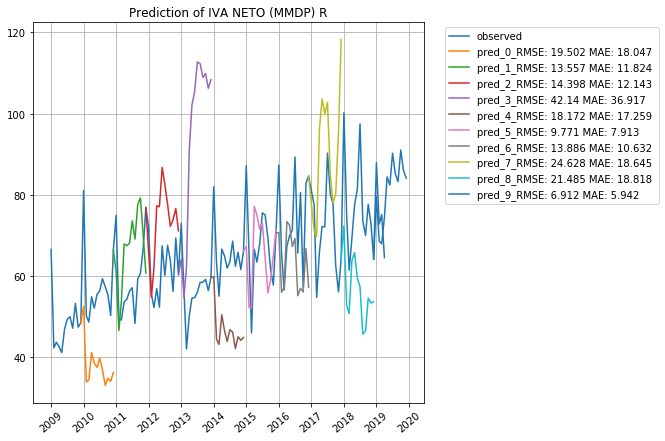

ARIMA: order: (3, 0, 2), 


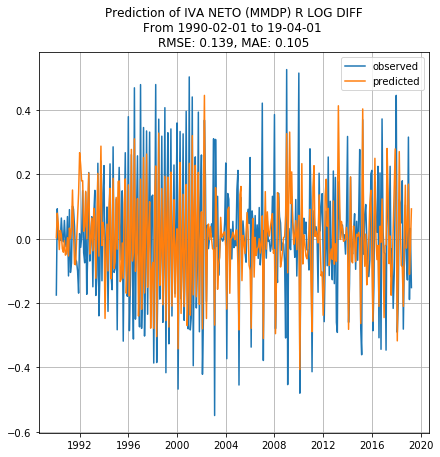

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ARIMA: order: (3, 0, 2), 


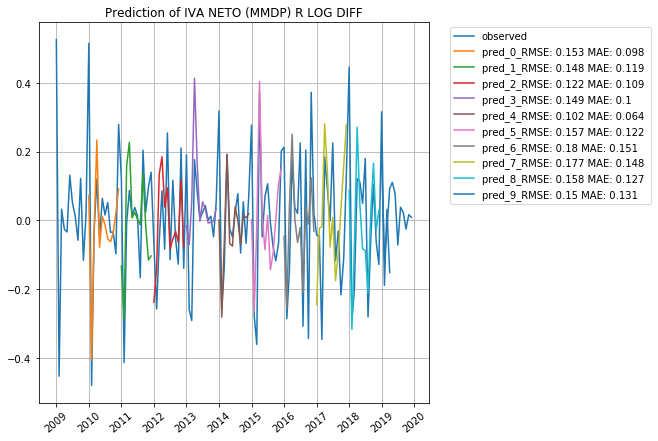

ARIMA: order: (3, 0, 2), 


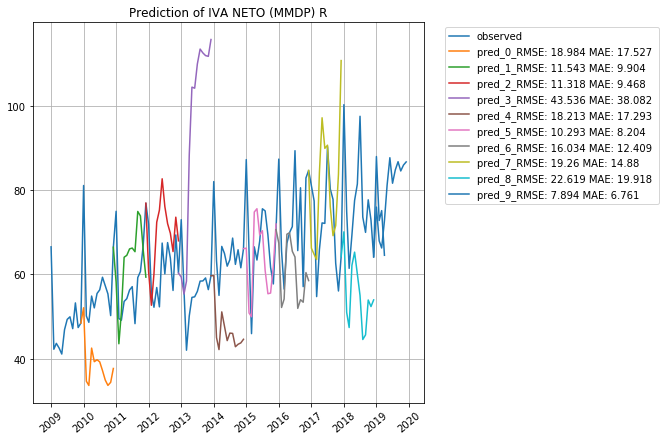

ARIMA: order: (3, 0, 3), 


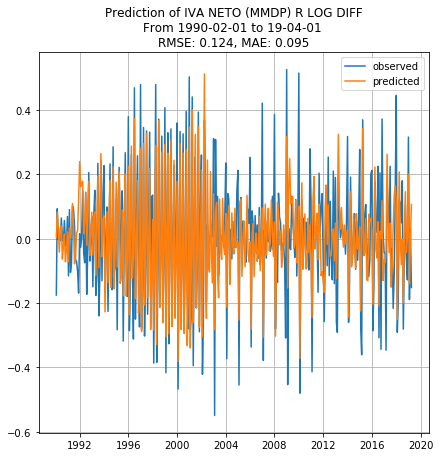

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ARIMA: order: (3, 0, 3), 


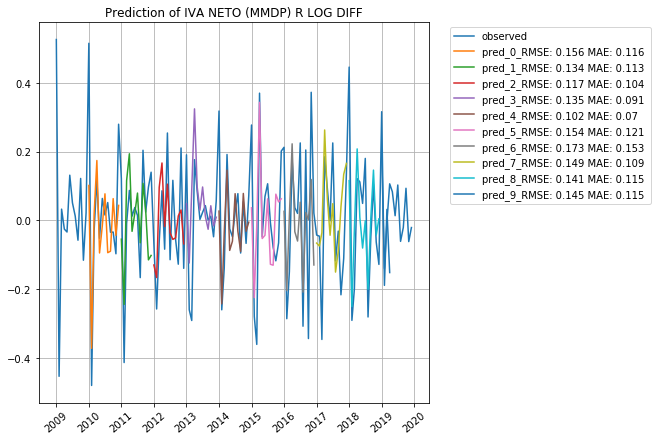

ARIMA: order: (3, 0, 3), 


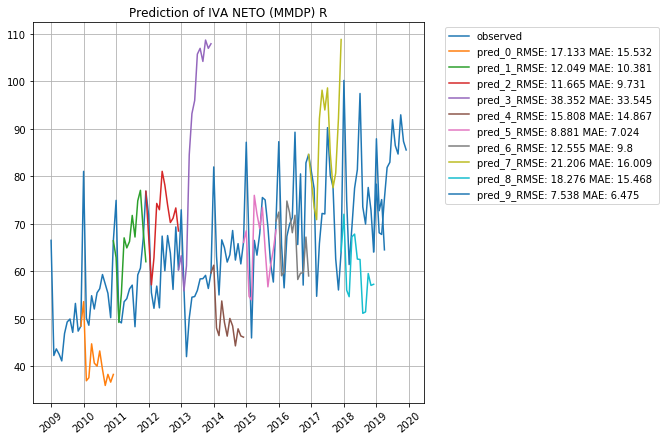

In [80]:
models.run_models('ARIMA', arima_params, outcome_ts, objective_ts, params, dynamic=False)

ARIMA: order: (2, 0, 2), 


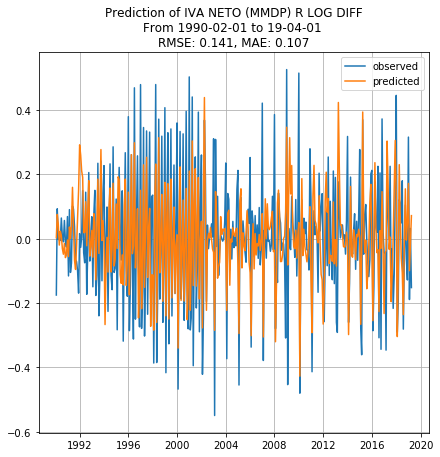

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ARIMA: order: (2, 0, 2), 


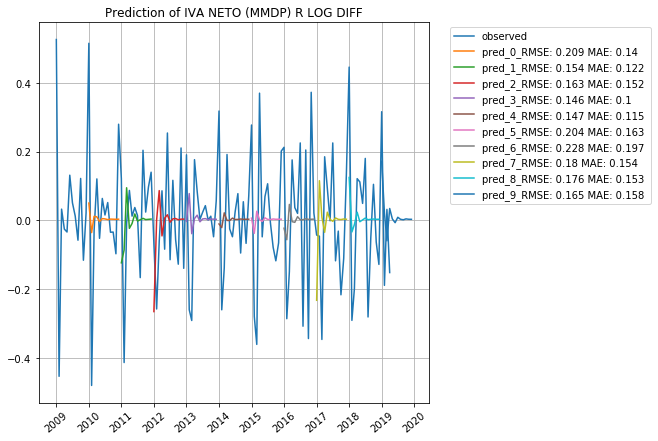

ARIMA: order: (2, 0, 2), 


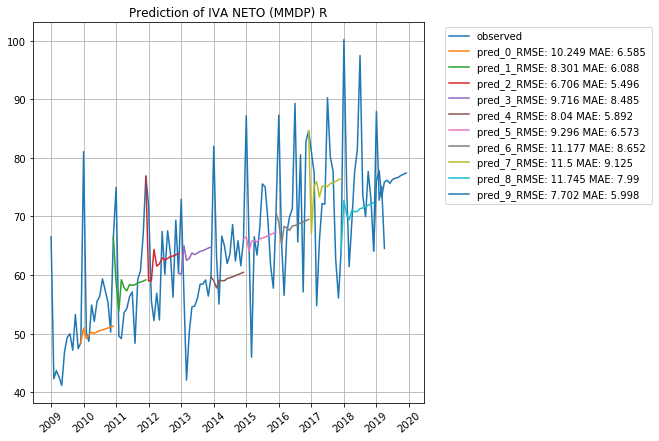

ARIMA: order: (2, 0, 3), 


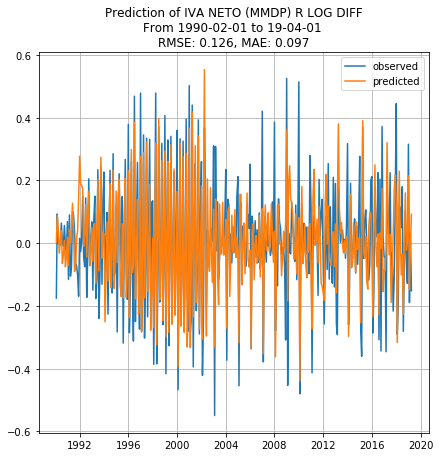

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ARIMA: order: (2, 0, 3), 


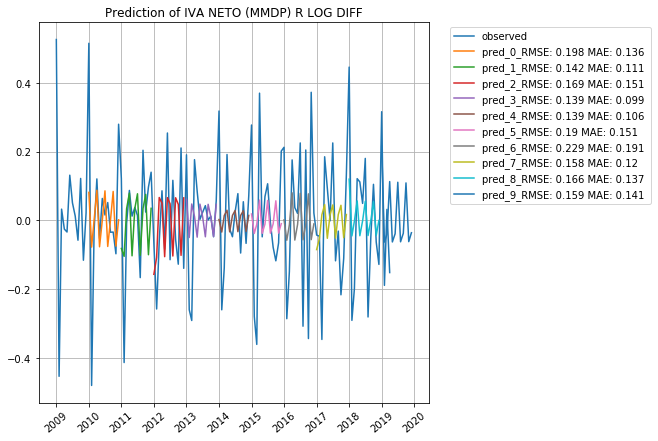

ARIMA: order: (2, 0, 3), 


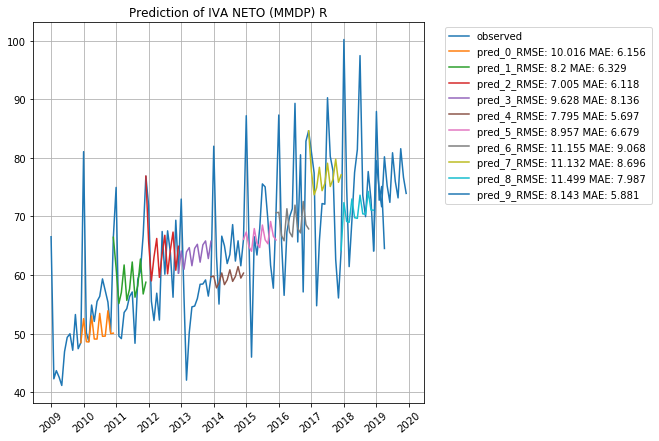

ARIMA: order: (3, 0, 2), 


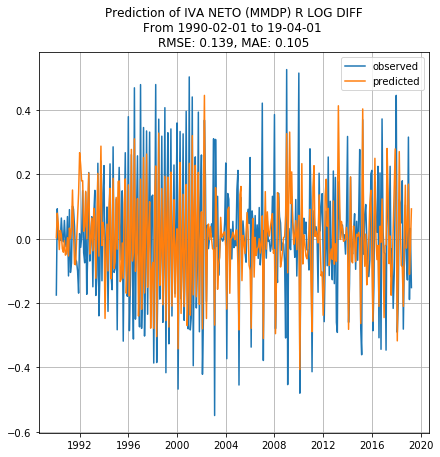

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ARIMA: order: (3, 0, 2), 


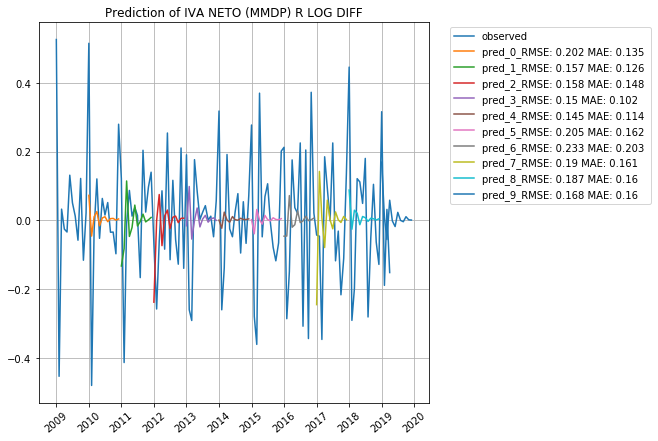

ARIMA: order: (3, 0, 2), 


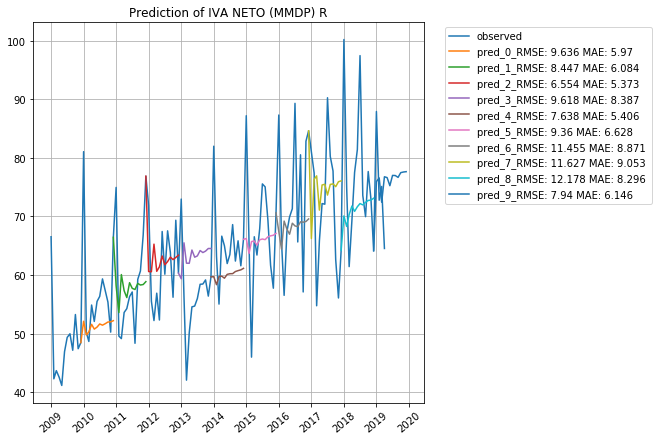

ARIMA: order: (3, 0, 3), 


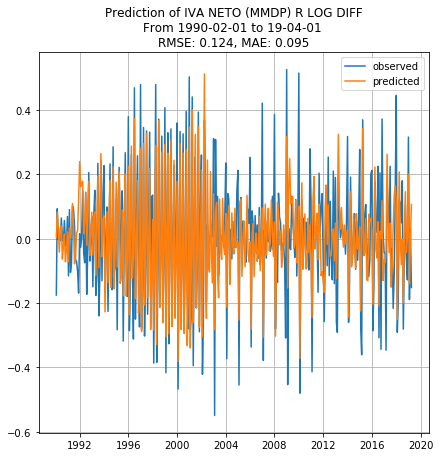

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ARIMA: order: (3, 0, 3), 


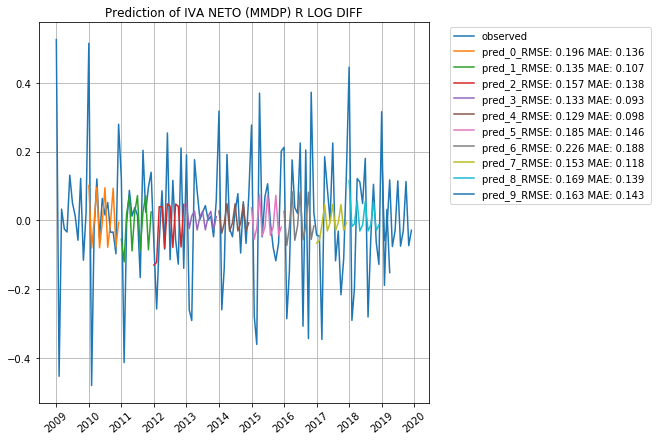

ARIMA: order: (3, 0, 3), 


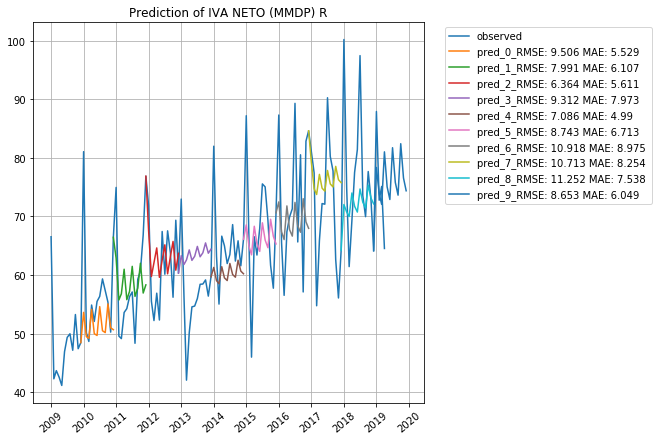

In [96]:
models.run_models('ARIMA', arima_params, outcome_ts, objective_ts, params)

In [90]:
objective_ts.loc[objective_ts.index == time_splits[4]]

fecha
2014-01-01    0.317655
Freq: MS, Name: observed, dtype: float64

In [93]:
pd.date_range(time_splits[0], time_splits[1], freq='MS')

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01'],
              dtype='datetime64[ns]', freq='MS')